<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

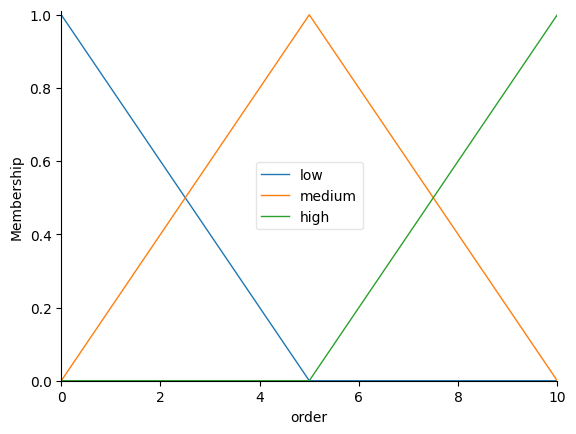

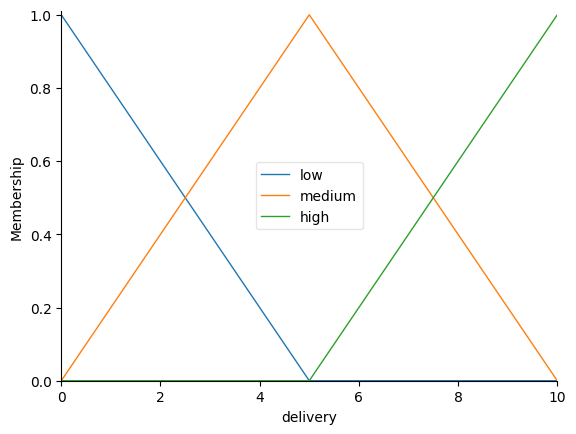

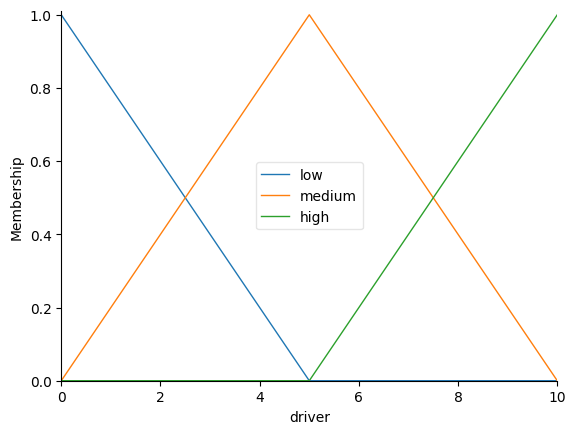

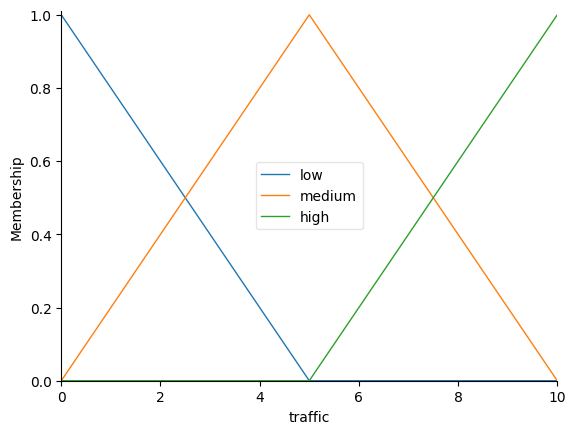

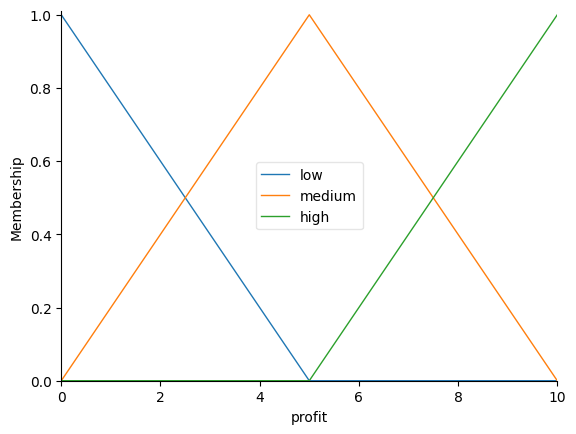

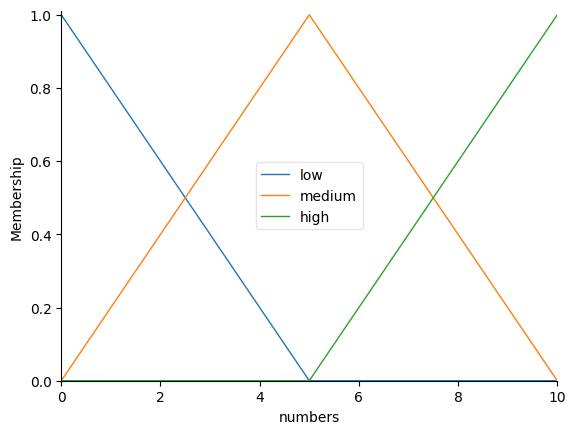

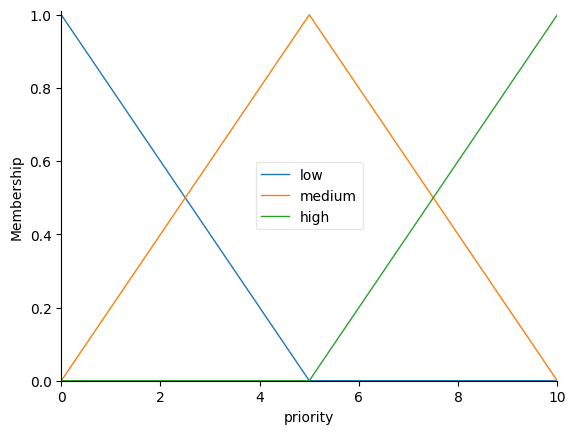

In [37]:
#T15 Logis
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
order=ctrl.Antecedent(np.arange(0,10.1,0.1),'order')
delivery=ctrl.Antecedent(np.arange(0,10.1,0.1),'delivery')
driver=ctrl.Antecedent(np.arange(0,10.1,0.1),'driver')
traffic=ctrl.Antecedent(np.arange(0,10.1,0.1),'traffic')
profit=ctrl.Antecedent(np.arange(0,10.1,0.1),'profit')
numbers=ctrl.Consequent(np.arange(0,10.1,0.1),'numbers')
priority=ctrl.Consequent(np.arange(0,10.1,0.1),'priority')
order['low']=fuzz.trimf(order.universe,[0,0,5])
order['medium']=fuzz.trimf(order.universe,[0,5,10])
order['high']=fuzz.trimf(order.universe,[5,10,10])
delivery['low']=fuzz.trimf(delivery.universe,[0,0,5])
delivery['medium']=fuzz.trimf(delivery.universe,[0,5,10])
delivery['high']=fuzz.trimf(delivery.universe,[5,10,10])
driver['low']=fuzz.trimf(driver.universe,[0,0,5])
driver['medium']=fuzz.trimf(driver.universe,[0,5,10])
driver['high']=fuzz.trimf(driver.universe,[5,10,10])
traffic['low']=fuzz.trimf(traffic.universe,[0,0,5])
traffic['medium']=fuzz.trimf(traffic.universe,[0,5,10])
traffic['high']=fuzz.trimf(traffic.universe,[5,10,10])
profit['low']=fuzz.trimf(profit.universe,[0,0,5])
profit['medium']=fuzz.trimf(profit.universe,[0,5,10])
profit['high']=fuzz.trimf(profit.universe,[5,10,10])
numbers['low']=fuzz.trimf(numbers.universe,[0,0,5])
numbers['medium']=fuzz.trimf(numbers.universe,[0,5,10])
numbers['high']=fuzz.trimf(numbers.universe,[5,10,10])
priority['low']=fuzz.trimf(priority.universe,[0,0,5])
priority['medium']=fuzz.trimf(priority.universe,[0,5,10])
priority['high']=fuzz.trimf(priority.universe,[5,10,10])
order.view()
delivery.view()
driver.view()
traffic.view()
profit.view()
numbers.view()
priority.view()

Numbers: 5.833333333333333
Priority: 4.477443609022554


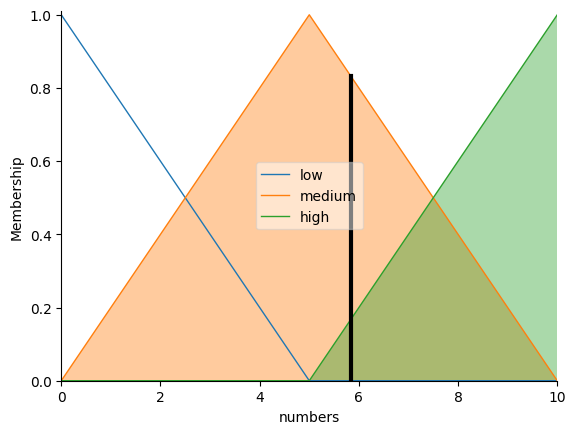

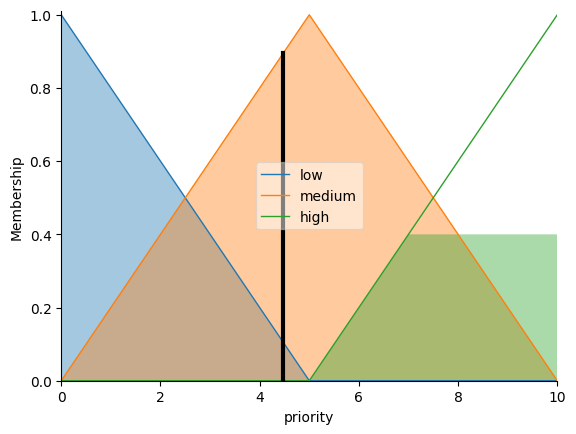

In [38]:
rule1=ctrl.Rule(order['high']|driver['low']|traffic['low'],numbers['high'])
rule2=ctrl.Rule(order['medium']|traffic['high']|delivery['medium'],numbers['medium'])
rule3=ctrl.Rule(driver['high']|order['high']|profit['medium'],numbers['medium'])
rule4=ctrl.Rule(order['low']|delivery['high']|traffic['medium'],numbers['medium'])
rule5=ctrl.Rule(profit['high']|delivery['high']|traffic['high'],numbers['medium'])
rule6=ctrl.Rule(delivery['high']|profit['high'],priority['high'])
rule7=ctrl.Rule(delivery['medium']|traffic['medium'],priority['medium'])
rule8=ctrl.Rule(delivery['low']|order['high']|profit['low'],priority['low'])
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['order']=10
control_sim.input['delivery']=7
control_sim.input['driver']=2
control_sim.input['traffic']=5
control_sim.input['profit']=5
control_sim.compute()
print(f"Numbers: {control_sim.output['numbers']}")
print(f"Priority: {control_sim.output['priority']}")
numbers.view(sim=control_sim)
priority.view(sim=control_sim)